**Reading and understanding the Data**

In [1]:
# importing the numpy and pandas package
import numpy as np
import pandas as pd

In [12]:
# importing data visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the data from url
data = pd.read_csv("http://bit.ly/w-data")

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Data Inspection**

In [5]:
data.shape

(25, 2)

In [6]:
data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data cleaning**

In [9]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

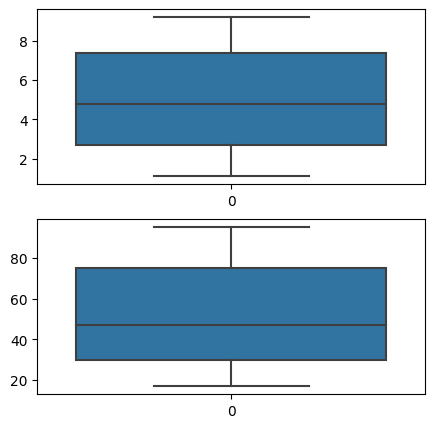

In [13]:
# Checking for Outliers
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(data['Hours'], ax = axs[0])
plt2 = sns.boxplot(data['Scores'], ax = axs[1])

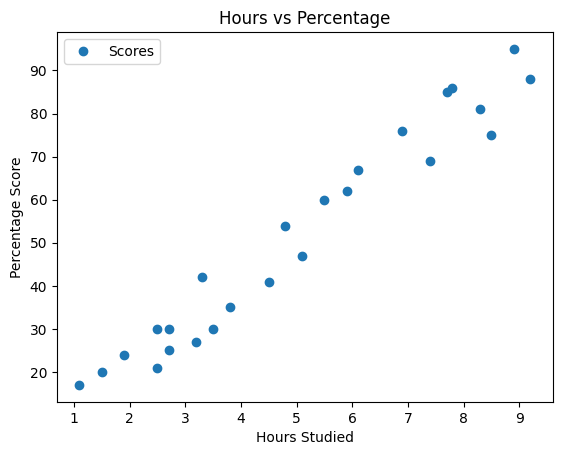

In [16]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [17]:
# data is clean and we don't need to do more analysis as there is only one independent and one dependent variable

In [18]:
#extraacting the dependent and independent variable
X = data['Hours']
Y = data['Scores']

**Dividing the data into training and testing as of we have less data so we put less in testing and more in training**

In [19]:
#importing library and doing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [20]:
# Let's now take a look at the train dataset

X_train.head()

19    7.4
23    6.9
21    4.8
6     9.2
12    4.5
Name: Hours, dtype: float64

In [21]:
y_train.head()

19    69
23    76
21    54
6     88
12    41
Name: Scores, dtype: int64

**building a Linear model**

In [22]:
# i am using stats model to fit the model we can also use sklearn library of linear regression
import statsmodels.api as sm

In [23]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [25]:
#checking parameters
lr.params

const    1.989423
Hours    9.835444
dtype: float64

In [26]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     356.7
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.59e-13
Time:                        08:02:09   Log-Likelihood:                -62.724
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9894      3.106      0.641      0.5

# From the parameters that we get, our linear regression equation becomes:

Scores=1.9894238 + 9.835444 × Hours

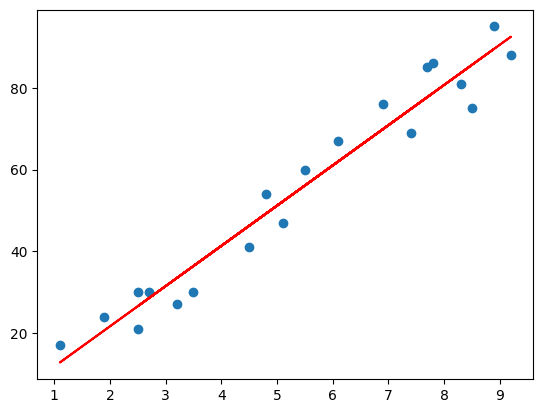

In [27]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.989423 + 9.835444 * X_train, 'r')
plt.show()

**Distribution of the error terms**

In [28]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-31-723b49e70e34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


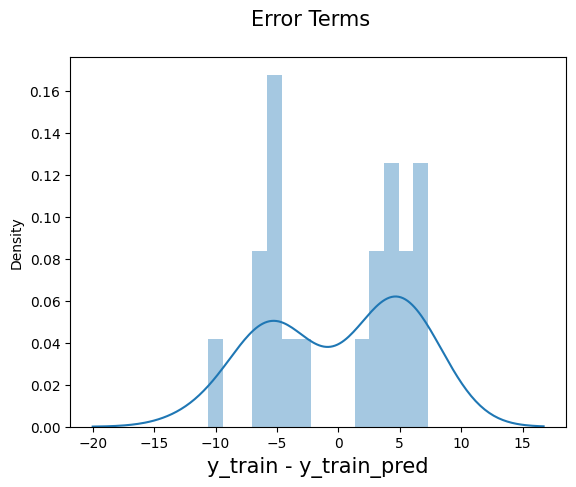

In [31]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [32]:
# not so good but we have less data we simply ignore this

In [33]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [34]:
y_pred.head()

9     28.545123
22    39.364112
13    34.446390
11    60.018545
5     16.742590
dtype: float64

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))
#this is our Rmse value

4.5432870183661045

In [38]:
#Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.9050356232459792